### Ben Porter
### This Lab is open from 10/18 at 6 am to 10/18 at 3:30 pm

The data set called Highway1 (used by  by Carl Hoffstedt in his paper: https://rdrr.io/rforge/alr4/man/Highway1.html) relate the automobile accident rate, in accidents per million vehicle miles to several potential terms. The data include 39 sections of large Highways in the state of Minnesota in 1973. The goal of this analysis is to see how the rate variable are affetcted by some of the variables that are highly correlated with the rate and finding out which ones affect the rate variable the most.

This data frame contains the following columns:

adt - average daily traffic count in thousands

trks - truck volume as a percent of the total volume

lane - total number of lanes of traffic

acpt - number of access points per mile

sigs - number of signalized interchanges per mile

itg - number of freeway-type interchanges per mile

slim - speed limit in 1973

len - length of the Highway segment in miles

lwid - lane width, in feet

shld - width in feet of outer shoulder on the roadway

htype - An indicator of the type of roadway or the source of funding for the road; "mc" for major collector, "fai" for Federal interstate highways, "pa" for principal arterial highway, and "ma" for major arterial highways

rate - 1973 accident rate per million vehicle miles

# This is half the semester. I have been giving you codes and almost all the answers until now. You will have to take it from here yourself. No actual codes and answers will be given out. Only the hints, and pointing you to the right direction will be done. This is to make you little more independent in codes so that you can do your project.

In [75]:
import pandas as pd
import numpy as np
import matplotlib as mpt
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
highway1 = pd.read_csv('Highway1.csv')

### Problem 1
This data came from R package which uses index starting at 1 unlike in python where indices  start at 0. When  you upload highway1 data to jupyter notebook, you will see an unnecessory column that says column 0. Remove it and find the correlation matrix of the remaining columns. In this data rate is the dependent variable. Find and report two variables that have 
the highest positive correlation and the hoghest negative correlation with the variable 'rate'.  Call these two variables $x$ and $z$ respectively. Make sure to avoid correlation with itself. (10 points)



In [76]:
highway1.drop(highway1.columns[0],axis=1)

,rate,len,ADT,trks,sigs1,slim,shld,lane,acpt,itg,lwid,hwy
0,4.58,4.99,69,8,0.200401,55,10,8,4.6,1.20,12,FAI
1,2.86,16.11,73,8,0.062073,60,10,4,4.4,1.43,12,FAI
2,3.02,9.75,49,10,0.102564,60,10,4,4.7,1.54,12,FAI
3,2.29,10.65,61,13,0.093897,65,10,6,3.8,0.94,12,FAI
4,1.61,20.01,28,12,0.049975,70,10,4,2.2,0.65,12,FAI
5,6.87,5.97,30,6,2.007504,55,10,4,24.8,0.34,12,PA
6,3.85,8.57,46,8,0.816686,55,8,4,11.0,0.47,12,PA
7,6.12,5.24,25,9,0.570840,55,10,4,18.5,0.38,12,PA
8,3.29,15.79,43,12,1.453331,50,4,4,7.5,0.95,12,PA
9,5.88,8.26,23,7,1.331065,50,5,4,8.2,0.12,12,PA


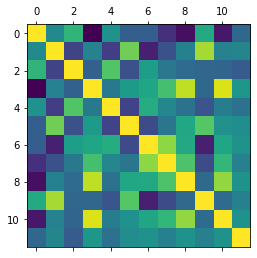

In [77]:
plt.matshow(highway1.corr())
plt.show()

ADT has the highest correlation and trks has the lowest.

In [78]:
x=highway1[['ADT']]
z=highway1[['trks']]

### Problem 2
Let $y$ be to the column 'rate' and $x$ to be the column  that you got in problem 1. Find the coefficients $\beta_0$ and $\beta_1$ in the linear regression equation $y\approx \beta_0 +\beta_1 x$. You will have to do linear regression modeling as hinted below. Report $R^2$ value here. Assuming that you did this correctly, $R^2$ value is a number between 0.5 and 0.6. That is not a good number for a linear regression. Explain in a paragraph, why is this $R^2$ value low here. Read more about $R^2$ value here.
https://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit
 Among many details that come out of the summary of linear model, we will only focus on Among on $R^2$ and the coef and intercept in this lab. (15 points)

In [79]:
y=highway1[['rate']]

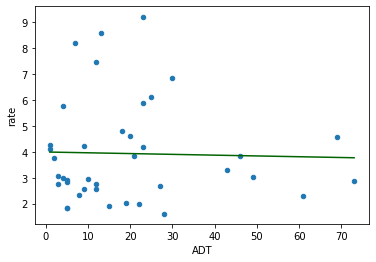

In [80]:
#Hints: Make sure to import the following packages together 
#with other packages we have been using. Linear model is within statmodels.
highway1.plot('ADT','rate',kind='scatter')
lm=sm.ols('rate ~ ADT',data=highway1).fit()
xmin=highway1.ADT.min()
xmax=highway1.ADT.max()
    
X=np.linspace(xmin,xmax, 100)
Y=lm.params[0]+lm.params[1]*X
plt.plot(X,Y, color="darkgreen")

In [81]:
lm=sm.ols(formula='rate ~ ADT', data=highway1).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rate   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.026
Method:                 Least Squares   F-statistic:                   0.03023
Date:                Fri, 18 Oct 2019   Prob (F-statistic):              0.863
Time:                        14:54:14   Log-Likelihood:                -81.576
No. Observations:                  39   AIC:                             167.2
Df Residuals:                      37   BIC:                             170.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.9931      0.471      8.473      0.000       3.038       4.948
ADT           -0.0030      0.018     -0.174      0.863      -0.039       0.032
==============================================================================
Omnibus:                        9.673   Durbin-Watson:                   1.553
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                9.140
Skew:                           1.159   Prob(JB):                       0.0104
Kurtosis:                       3.502   Cond. No.                         39.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R^2 value is low for a couple reasons. The main reason is that the correlation between these two is not very strong. This data would not be great to use to make prediction but this low R^2 is to be expected when working with numbers that relate to human behavior because of the unpredictable nature of humans.

# Read more about statmodels linear regression here.
https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html

### Problem 3
Repreat Problem 2 with the variable y and z. Find the intercept and the coefficient. It looks like these two variables are negatively correlated. Why do you think that is? (15 points)

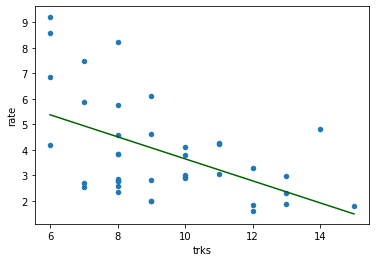

In [82]:
plot1=highway1.plot('trks','rate',kind='scatter')
lm1=sm.ols('rate ~ trks',data=highway1).fit()
xmin=highway1.trks.min()
xmax=highway1.trks.max()
    
X=np.linspace(xmin,xmax, 100)
Y=lm1.params[0]+lm1.params[1]*X
plt.plot(X,Y, color="darkgreen")

In [83]:
lm1=sm.ols(formula='rate ~ trks', data=highway1).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rate   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     13.18
Date:                Fri, 18 Oct 2019   Prob (F-statistic):           0.000851
Time:                        14:54:15   Log-Likelihood:                -75.649
No. Observations:                  39   AIC:                             155.3
Df Residuals:                      37   BIC:                             158.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.9682      1.145      6.957      0.000       5.648      10.289
trks          -0.4323      0.119     -3.631      0.001      -0.674      -0.191
==============================================================================
Omnibus:                        2.989   Durbin-Watson:                   1.619
Prob(Omnibus):                  0.224   Jarque-Bera (JB):                2.755
Skew:                           0.623   Prob(JB):                        0.252
Kurtosis:                       2.625   Cond. No.                         40.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

It seems like the negative correlation must be due to the rate of crashes lowering the more trucks there are on the road possibly because they take up more space so there are less total cars or possibly people are more careful around trucks.

### Problem 4
Make a scatter plot of the data you used in problem 2 together with the fitted line. Label the plot apprpriately. Do the same for the data in problem 3. You will have to submit two plots. (10 points)

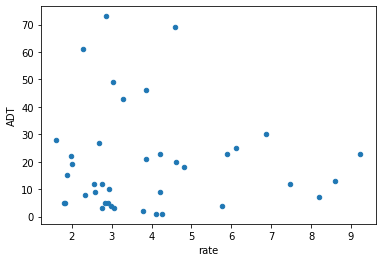

In [86]:
highway1.plot.scatter('rate', 'ADT')

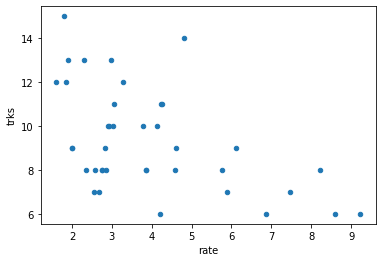

In [87]:
highway1.plot.scatter('rate', 'trks')